In [2]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.models import load_model
import cv2


In [8]:
# Set the path to your dataset folder
dataset_path = "D:/build_assessment/data/train"

# Set the image size you want to resize to
image_size = (64, 64)

In [9]:
# Load and preprocess the dataset
X = []
y = []

In [10]:
# Load images from the '0' folder (non-cancerous images)
folder_0 = os.path.join(dataset_path, '0')
for filename in os.listdir(folder_0):
    image_path = os.path.join(folder_0, filename)
    image = load_img(image_path, target_size=image_size)
    image_array = img_to_array(image) / 255.0
    X.append(image_array)
    y.append(0)

In [11]:
# Load images from the '1' folder (non-cancerous images)
folder_1 = os.path.join(dataset_path, '1')
for filename in os.listdir(folder_1):
    image_path = os.path.join(folder_1, filename)
    image = load_img(image_path, target_size=image_size)
    image_array = img_to_array(image) / 255.0
    X.append(image_array)
    y.append(1)

In [12]:
# Load images from the '2' folder (non-cancerous images)
folder_2 = os.path.join(dataset_path, '2')
for filename in os.listdir(folder_2):
    image_path = os.path.join(folder_2, filename)
    image = load_img(image_path, target_size=image_size)
    image_array = img_to_array(image) / 255.0
    X.append(image_array)
    y.append(2)

In [13]:
# Load images from the '0' folder (non-cancerous images)
folder_3 = os.path.join(dataset_path, '3')
for filename in os.listdir(folder_3):
    image_path = os.path.join(folder_3, filename)
    image = load_img(image_path, target_size=image_size)
    image_array = img_to_array(image) / 255.0
    X.append(image_array)
    y.append(3)

In [14]:
# Convert the lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [20]:
# # Build the CNN model
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(4, activation='softmax'))

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Load pre-trained VGG model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(None, None, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer
x = Dense(1024, activation='relu')(x)

# Add a logistic layer for the number of classes you want to predict
output = Dense(4, activation='softmax')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=output)
# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False


In [30]:
from tensorflow.keras.applications import EfficientNetB0
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(None, None, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

# Add a logistic layer for the number of classes you want to predict
output = Dense(4, activation='softmax')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=output)

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

In [31]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [32]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

# Define the callbacks
checkpoint = ModelCheckpoint('model.h5', save_best_only=True, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)
csv_logger = CSVLogger('training.log')

In [24]:
# Train the model on vggnet
history = model.fit(X_train, y_train, batch_size=32, epochs=25, validation_data=(X_test, y_test),callbacks=[checkpoint, early_stopping, reduce_lr, csv_logger])

Epoch 1/25
261/261 [==============================] - ETA: 0s - loss: 1.0280 - accuracy: 0.5393

d:\conda\envs\waldo\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


261/261 [==============================] - 238s 916ms/step - loss: 1.0280 - accuracy: 0.5393 - val_loss: 1.0069 - val_accuracy: 0.5635 - lr: 0.0010
Epoch 2/25
261/261 [==============================] - 244s 936ms/step - loss: 0.9861 - accuracy: 0.5606 - val_loss: 0.9793 - val_accuracy: 0.5530 - lr: 0.0010
Epoch 3/25
261/261 [==============================] - 230s 881ms/step - loss: 0.9575 - accuracy: 0.5724 - val_loss: 0.9623 - val_accuracy: 0.5635 - lr: 0.0010
Epoch 4/25
261/261 [==============================] - 251s 962ms/step - loss: 0.9254 - accuracy: 0.5890 - val_loss: 0.9546 - val_accuracy: 0.5559 - lr: 0.0010
Epoch 5/25
261/261 [==============================] - 277s 1s/step - loss: 0.9108 - accuracy: 0.5976 - val_loss: 0.9791 - val_accuracy: 0.5683 - lr: 0.0010
Epoch 6/25
261/261 [==============================] - 242s 927ms/step - loss: 0.8891 - accuracy: 0.6111 - val_loss: 0.9466 - val_accuracy: 0.5755 - lr: 0.0010
Epoch 7/25
261/261 [==============================] - 239s 9

In [25]:
# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9553037285804749
Test accuracy: 0.5860911011695862


In [26]:
model.save('D:/build_assessment/damage_model.h5')

In [33]:
# Train the model on efficientnet
history = model.fit(X_train, y_train, batch_size=32, epochs=25, validation_data=(X_test, y_test),callbacks=[checkpoint, early_stopping, reduce_lr, csv_logger])

Epoch 1/25
261/261 [==============================] - 46s 142ms/step - loss: 1.3868 - accuracy: 0.3569 - val_loss: 1.3493 - val_accuracy: 0.3712 - lr: 0.0010
Epoch 2/25
261/261 [==============================] - 39s 148ms/step - loss: 1.3543 - accuracy: 0.3680 - val_loss: 1.3514 - val_accuracy: 0.3712 - lr: 0.0010
Epoch 3/25
261/261 [==============================] - 43s 166ms/step - loss: 1.3529 - accuracy: 0.3680 - val_loss: 1.3631 - val_accuracy: 0.3712 - lr: 0.0010
Epoch 4/25
261/261 [==============================] - ETA: 0s - loss: 1.3533 - accuracy: 0.3680
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
261/261 [==============================] - 43s 163ms/step - loss: 1.3533 - accuracy: 0.3680 - val_loss: 1.3517 - val_accuracy: 0.3712 - lr: 0.0010
Epoch 5/25
261/261 [==============================] - 46s 175ms/step - loss: 1.3509 - accuracy: 0.3680 - val_loss: 1.3484 - val_accuracy: 0.3712 - lr: 2.0000e-04
Epoch 6/25
261/261 [========================

In [36]:
# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.348509430885315
Test accuracy: 0.3712230324745178


In [37]:
model.save('D:/build_assessment/damage_model_efficientnet.h5')

In [27]:
model=load_model('D:/build_assessment/damage_model.h5')

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as img
# reading the image
testImage = img.imread('D:/build_assessment/data/yushu/2/yushu_1010470.tif')
# displaying the image
plt.imshow(testImage)

ModuleNotFoundError: No module named 'matplotlib'

TypeError: Image data of dtype object cannot be converted to float

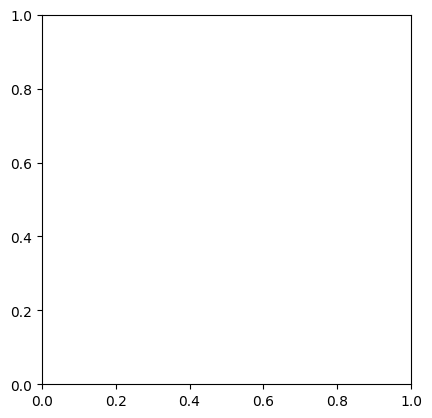

In [6]:
import cv2
import matplotlib.pyplot as plt
a=cv2.imread('/content/build_assessment/data/yushu/2/yushu_1010470.tif')
plt.imshow(a)

In [32]:
img = load_img('/content/build_assessment/data/yushu/2/yushu_1010470.tif',target_size=(64,64))
x = img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op = ['0','1','2','3']
op[pred]

1/1 [==============================] - 0s 82ms/step


'2'

In [33]:
img = load_img('/content/build_assessment/data/yushu/1/yushu_1084469.tif',target_size=(64,64))
x = img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op = ['0','1','2','3']
op[pred]

1/1 [==============================] - 0s 23ms/step


'2'

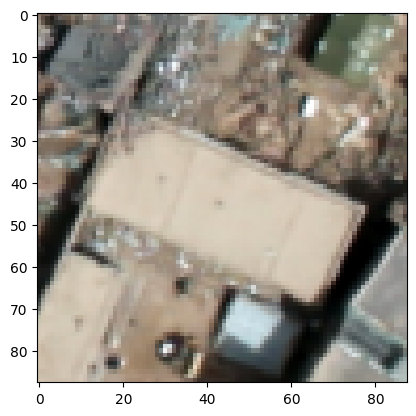

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as img
# reading the image
testImage = img.imread('/content/build_assessment/data/yushu/1/yushu_1215797.tif')
# displaying the image
plt.imshow(testImage)

In [34]:
img = load_img('D:/build_assessment/data/yushu/3/yushu_1113437.tif',target_size=(64,64))
x = img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op = ['0','1','2','3']
op[pred]

1/1 [==============================] - 0s 22ms/step


'1'

In [35]:
img = load_img('/content/drive/MyDrive/CEG/Sem 8/K! Hacks 2024/ph21.jpg',target_size=(64,64))
x = img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op = ['0','1','2','3']
op[pred]

1/1 [==============================] - 0s 23ms/step


'2'

In [ ]:
import cv2

from PIL import Image

i=cv2.imshow('/content/drive/MyDrive/CEG/Sem 8/K! Hacks 2024/ph22.jpg')

In [36]:
img = load_img('/content/drive/MyDrive/CEG/Sem 8/K! Hacks 2024/ph22.jpg',target_size=(64,64))
x = img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op = ['0','1','2','3']
op[pred]

1/1 [==============================] - 0s 36ms/step


'2'